# WeatherPy
----
#### Author: Felipe Murillo
#### Date: May 1, 2020
#### Description: Visualize weather of 500+ cities across the world of varying distance from the equator
#### Inputs:  OpenWeatherMap API (and corresponding key)
#### Output: ./output_data/cities.csv
----

### Install citipy module and setup dependencies

In [1]:
# Install citipy module
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key_openWeather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lat = []
city_long = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])
        city_long.append(lat_lng[1])

# Print the city count to confirm sufficient count
len(cities)

592

In [4]:
# Create city weather dataFrame skeleton
city_weather_df = pd.DataFrame({"City":cities})
city_weather_df["City Name"] = ""
city_weather_df["Country"] = ""
city_weather_df["Lng"] = ""
city_weather_df["Lat"] = ""
city_weather_df["Max Temp (F)"] = ""
city_weather_df["Humidity (%)"]=""
city_weather_df["Cloudiness (%)"] = ""
city_weather_df["Wind Speed (mph)"] = ""

city_weather_df.head()

,City,City Name,Country,Lng,Lat,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,vyazemskiy,,,,,,,,
1,sisimiut,,,,,,,,
2,barrow,,,,,,,,
3,zhigansk,,,,,,,,
4,vaini,,,,,,,,


### Perform API Calls and store data into weather dataframe

In [5]:
# Base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Specify temperature in degrees Celsius rather than Kelvin
units = "imperial"

# Build base query URL
base_url = f"{url}appid={api_key_openWeather}&units={units}&q="

# Use for loop to cycle thru each city
for index, city in city_weather_df.iterrows():

    # Print to screen which city is currently being called
    print(f"Retrieving Results for index: {index}, city: {city.loc['City']}")
    
    # Construct query_url
    query_url = base_url + city.loc["City"]
    
    # Request weather data for desired city
    weather_request = requests.get(query_url).json()
     
    # Extract desired data: 
    # longitude, latitude, temperature (deg F), humidity (%), cloudiness (%), wind speed (mph)
    
    try:
        city_weather_df.loc[index, 'City Name'] = weather_request['name']
        city_weather_df.loc[index, 'Country'] = weather_request['sys']['country']  
        city_weather_df.loc[index, 'Lng'] = weather_request['coord']['lon']
        city_weather_df.loc[index, 'Lat'] = weather_request['coord']['lat']
        city_weather_df.loc[index, 'Max Temp (F)'] = weather_request['main']['temp_max']
        city_weather_df.loc[index, 'Humidity (%)'] = weather_request['main']['humidity']
        city_weather_df.loc[index, 'Cloudiness (%)'] = weather_request['clouds']['all']
        city_weather_df.loc[index, 'Wind Speed (mph)'] = weather_request['wind']['speed']
        
    except (KeyError, IndexError):
        print("City Not Found... skipping.")
        
    print("------------")

Retrieving Results for index: 0, city: vyazemskiy
------------
Retrieving Results for index: 1, city: sisimiut
------------
Retrieving Results for index: 2, city: barrow
------------
Retrieving Results for index: 3, city: zhigansk
------------
Retrieving Results for index: 4, city: vaini
------------
Retrieving Results for index: 5, city: northam
------------
Retrieving Results for index: 6, city: manuk mangkaw
------------
Retrieving Results for index: 7, city: cape town
------------
Retrieving Results for index: 8, city: port alfred
------------
Retrieving Results for index: 9, city: severo-kurilsk
------------
Retrieving Results for index: 10, city: bredasdorp
------------
Retrieving Results for index: 11, city: jamestown
------------
Retrieving Results for index: 12, city: geraldton
------------
Retrieving Results for index: 13, city: limoux
------------
Retrieving Results for index: 14, city: wamba
------------
Retrieving Results for index: 15, city: balabac
------------
Retrievin

------------
Retrieving Results for index: 127, city: sorland
------------
Retrieving Results for index: 128, city: yakeshi
------------
Retrieving Results for index: 129, city: old road
City Not Found... skipping.
------------
Retrieving Results for index: 130, city: saint-pierre
------------
Retrieving Results for index: 131, city: half moon bay
------------
Retrieving Results for index: 132, city: manaus
------------
Retrieving Results for index: 133, city: smithers
------------
Retrieving Results for index: 134, city: attawapiskat
City Not Found... skipping.
------------
Retrieving Results for index: 135, city: sitka
------------
Retrieving Results for index: 136, city: pangai
------------
Retrieving Results for index: 137, city: nikolskoye
------------
Retrieving Results for index: 138, city: komsomolskiy
------------
Retrieving Results for index: 139, city: malakal
------------
Retrieving Results for index: 140, city: san isidro
------------
Retrieving Results for index: 141, cit

------------
Retrieving Results for index: 250, city: cozumel
------------
Retrieving Results for index: 251, city: katangli
------------
Retrieving Results for index: 252, city: port hardy
------------
Retrieving Results for index: 253, city: buala
------------
Retrieving Results for index: 254, city: itoman
------------
Retrieving Results for index: 255, city: ruteng
------------
Retrieving Results for index: 256, city: taltal
------------
Retrieving Results for index: 257, city: cabo san lucas
------------
Retrieving Results for index: 258, city: waipawa
------------
Retrieving Results for index: 259, city: necochea
------------
Retrieving Results for index: 260, city: tura
------------
Retrieving Results for index: 261, city: yagodnoye
------------
Retrieving Results for index: 262, city: tanda
------------
Retrieving Results for index: 263, city: brae
------------
Retrieving Results for index: 264, city: fairbanks
------------
Retrieving Results for index: 265, city: catia la mar


------------
Retrieving Results for index: 375, city: pangnirtung
------------
Retrieving Results for index: 376, city: utiroa
City Not Found... skipping.
------------
Retrieving Results for index: 377, city: zaranj
------------
Retrieving Results for index: 378, city: bathsheba
------------
Retrieving Results for index: 379, city: lexington
------------
Retrieving Results for index: 380, city: manbij
------------
Retrieving Results for index: 381, city: hvammstangi
City Not Found... skipping.
------------
Retrieving Results for index: 382, city: dhidhdhoo
------------
Retrieving Results for index: 383, city: along
------------
Retrieving Results for index: 384, city: viana
------------
Retrieving Results for index: 385, city: maridi
------------
Retrieving Results for index: 386, city: san matias
------------
Retrieving Results for index: 387, city: kargasok
------------
Retrieving Results for index: 388, city: iqaluit
------------
Retrieving Results for index: 389, city: flinders
---

------------
Retrieving Results for index: 500, city: okhotsk
------------
Retrieving Results for index: 501, city: vanimo
------------
Retrieving Results for index: 502, city: kokopo
------------
Retrieving Results for index: 503, city: kuche
City Not Found... skipping.
------------
Retrieving Results for index: 504, city: naze
------------
Retrieving Results for index: 505, city: boende
------------
Retrieving Results for index: 506, city: bumba
------------
Retrieving Results for index: 507, city: hargeysa
------------
Retrieving Results for index: 508, city: muroto
------------
Retrieving Results for index: 509, city: itarema
------------
Retrieving Results for index: 510, city: sambava
------------
Retrieving Results for index: 511, city: orthez
------------
Retrieving Results for index: 512, city: mantua
------------
Retrieving Results for index: 513, city: gordeyevka
------------
Retrieving Results for index: 514, city: mlonggo
------------
Retrieving Results for index: 515, cit

In [6]:
# Ensure dataframe is being populated correctly.
# Note: Cities not found will not be populated. Corresponding indices will be removed in the next step.
city_weather_df.head()

,City,City Name,Country,Lng,Lat,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,vyazemskiy,Vyazemskiy,RU,134.75,47.54,47.19,59,58,0.65
1,sisimiut,Sisimiut,GL,-53.67,66.94,25.29,92,100,8.84
2,barrow,Barrow,US,-156.79,71.29,8.6,84,1,11.41
3,zhigansk,Zhigansk,RU,123.37,66.77,28.8,95,80,9.89
4,vaini,Vaini,TO,-175.2,-21.2,80.6,78,40,5.82


In [7]:
# Ensure all items are in dataframe
len(city_weather_df.index)

592

In [8]:
# Remove cities that were not found in the OpenWeather query
city_weather_df = city_weather_df[city_weather_df["City Name"] != ""]
city_weather_df.head()

,City,City Name,Country,Lng,Lat,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,vyazemskiy,Vyazemskiy,RU,134.75,47.54,47.19,59,58,0.65
1,sisimiut,Sisimiut,GL,-53.67,66.94,25.29,92,100,8.84
2,barrow,Barrow,US,-156.79,71.29,8.6,84,1,11.41
3,zhigansk,Zhigansk,RU,123.37,66.77,28.8,95,80,9.89
4,vaini,Vaini,TO,-175.2,-21.2,80.6,78,40,5.82


In [9]:
# Ensure empty rows were removed
len(city_weather_df.index)

535

### Export data frame into CSV

In [10]:
# Add dependincies
import os

# Exporting rertrieved data to CSV (to avoid making another resource consuming request)
output =  os.path.join("output_data","cities.csv")

# If the Output folder does not exist, create it; if it does, use it!
os.makedirs(os.path.dirname(output), exist_ok=True)

# Write output to csv file and close it when done
city_weather_df.to_csv(output)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
# Create a scatter plot function
def weather_scat(title,x_term,y_term,x_label,y_label,color):
    t = time.localtime()
    current_time = time.strftime("%b %d %Y %H:%M:%S", t)
    x_series = city_weather_df[x_term]
    y_series = city_weather_df[y_term]
    plt.scatter(x_series,
                y_series,
                marker="o",
                edgecolors='black',
                color = color
               )
    plt.title(f"{title}\n({current_time})",fontweight="bold")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(alpha = 0.25)
    plt.savefig("output_data/"+title+".png")

#### Latitude vs. Temperature Plot

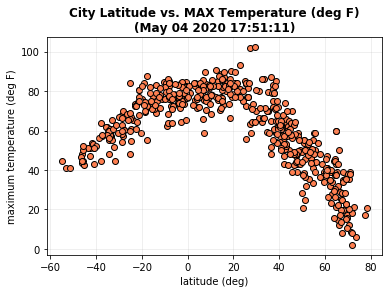

In [12]:
plot_title = "City Latitude vs. MAX Temperature (deg F)"

weather_scat(plot_title,
             "Lat",
             "Max Temp (F)",
             "latitude (deg)",
             "maximum temperature (deg F)",
             "coral")
plt.show()

##### <font color = blue>This plot shows that hotter temperatures occur near the equator and tropics, getting colder around the poles (closer to +90, -90 deg lattitude)</font>

#### Latitude vs. Humidity Plot

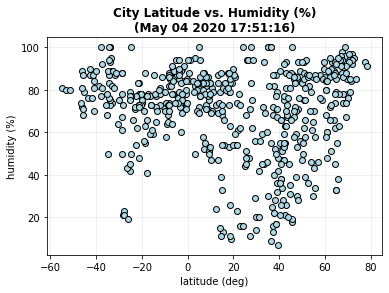

In [13]:
plot_title = "City Latitude vs. Humidity (%)"

weather_scat(plot_title,
             "Lat",
             "Humidity (%)",
             "latitude (deg)",
             "humidity (%)",
             "LightBlue")
plt.show()

##### <font color = blue>This plot shows a small cluster of high humidity occuring at the equator and at a latitude = 65 deg</font>

#### Latitude vs. Cloudiness Plot

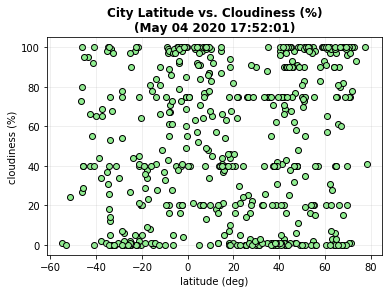

In [14]:
plot_title = "City Latitude vs. Cloudiness (%)"

weather_scat(plot_title,
             "Lat",
             "Cloudiness (%)",
             "latitude (deg)",
             "cloudiness (%)",
             "LightGreen")
plt.show()

##### <font color = blue>This plot shows how cloudiness is not predicatable by city latitude</font>

#### Latitude vs. Wind Speed Plot

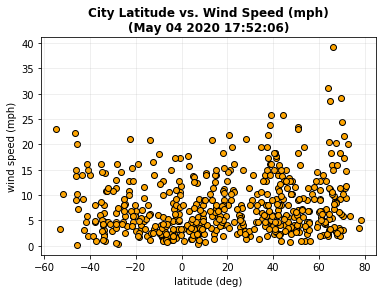

In [15]:
plot_title = "City Latitude vs. Wind Speed (mph)"

weather_scat(plot_title,
             "Lat",
             "Wind Speed (mph)",
             "latitude (deg)",
             "wind speed (mph)",
             "orange")
plt.show()

##### <font color = blue>This plot shows that the average wind speed around the world is between 0 to 10 mph</font>

## Linear Regression

In [16]:
# Load data set
city_weather_df = pd.read_csv("../WeatherPy/output_data/cities.csv",index_col=0)
city_weather_df.head()

,City,City Name,Country,Lng,Lat,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,vyazemskiy,Vyazemskiy,RU,134.75,47.54,47.19,59,58,0.65
1,sisimiut,Sisimiut,GL,-53.67,66.94,25.29,92,100,8.84
2,barrow,Barrow,US,-156.79,71.29,8.60,84,1,11.41
3,zhigansk,Zhigansk,RU,123.37,66.77,28.80,95,80,9.89
4,vaini,Vaini,TO,-175.20,-21.20,80.60,78,40,5.82


In [17]:
# Create a function to create Linear Regression plots
def make_regress_plots(title,x_term,y_term,x_label,y_label,x_annotate,y_annotate):
    t = time.localtime()
    current_time = time.strftime("%b %d %Y %H:%M:%S", t)
    x_values = x_term
    y_values = y_term
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,
                y_values,
                marker="o",
                color="lightslategrey",
                alpha = 0.5)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    plt.title(f"{title}\n{current_time}\n($r^2$ = {round(rvalue**2,5)})",fontweight="bold")
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig("output_data/"+title+".png")

In [18]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = city_weather_df.loc[city_weather_df["Lat"] > 0]
south_hemi = city_weather_df.loc[city_weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

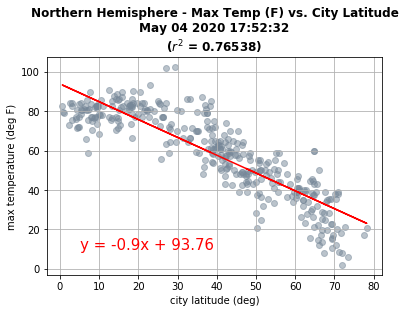

In [19]:
title ="Northern Hemisphere - Max Temp (F) vs. City Latitude"
make_regress_plots(title,
                   north_hemi["Lat"],
                   north_hemi["Max Temp (F)"],
                   "city latitude (deg)",
                   "max temperature (deg F)",
                   5,
                   10
                  )
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

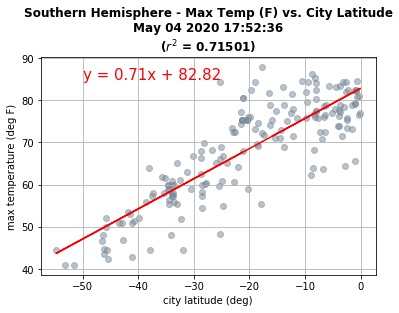

In [20]:
title ="Southern Hemisphere - Max Temp (F) vs. City Latitude"
make_regress_plots(title,
                   south_hemi["Lat"],
                   south_hemi["Max Temp (F)"],
                   "city latitude (deg)",
                   "max temperature (deg F)",
                   -50,
                   85
                  )
plt.show()

##### <font color = blue>The plots above show that a city's max temperature is correlated to its geographical latitude. The farther you move away from the equator, the cooler the temperatures get.</font>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

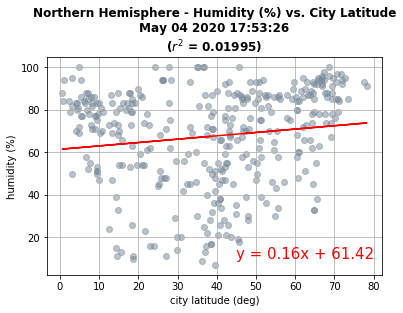

In [21]:
title ="Northern Hemisphere - Humidity (%) vs. City Latitude"
make_regress_plots(title,
                   north_hemi["Lat"],
                   north_hemi["Humidity (%)"],
                   "city latitude (deg)",
                   "humidity (%)",
                   45,
                   10
                  )
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

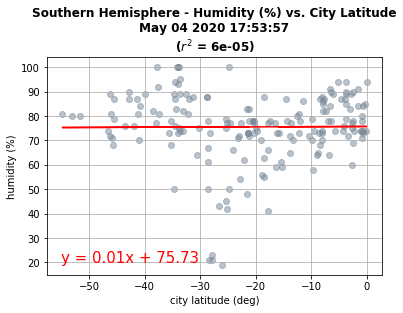

In [23]:
title ="Southern Hemisphere - Humidity (%) vs. City Latitude"
make_regress_plots(title,
                   south_hemi["Lat"],
                   south_hemi["Humidity (%)"],
                   "city latitude (deg)",
                   "humidity (%)",
                   -55,
                   20
                  )
plt.show()

##### <font color = blue>The plots above show that a city's humidity is not correlated to its geographical latitude.</font>
    
##### <font color = blue>From the regression lines, humidity slightly increases in the northern hemisphere away from the equator. In the southern hemishere, no real trend is observed.</font>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

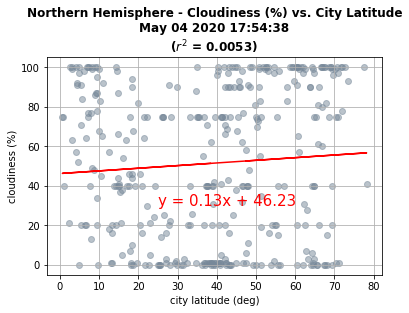

In [24]:
title ="Northern Hemisphere - Cloudiness (%) vs. City Latitude"
make_regress_plots(title,
                   north_hemi["Lat"],
                   north_hemi["Cloudiness (%)"],
                   "city latitude (deg)",
                   "cloudiness (%)",
                   25,
                   30
                  )
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

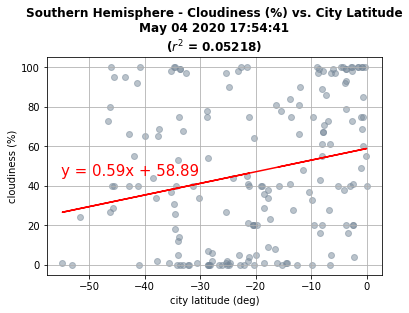

In [25]:
title ="Southern Hemisphere - Cloudiness (%) vs. City Latitude"
make_regress_plots(title,
                   south_hemi["Lat"],
                   south_hemi["Cloudiness (%)"],
                   "city latitude (deg)",
                   "cloudiness (%)",
                   -55,
                   45
                  )
plt.show()

##### <font color = blue>The plots above show that a city's level of cloudiness is not correlated to its geographical latitude.</font>
    
##### <font color = blue>From the regression lines, cities are less cloudy as their latitude decreases.</font>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

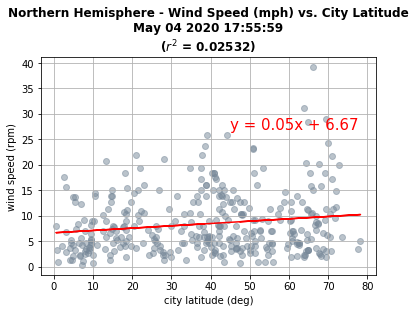

In [26]:
title ="Northern Hemisphere - Wind Speed (mph) vs. City Latitude"
make_regress_plots(title,
                   north_hemi["Lat"],
                   north_hemi["Wind Speed (mph)"],
                   "city latitude (deg)",
                   "wind speed (rpm)",
                   45,
                   27
                  )
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

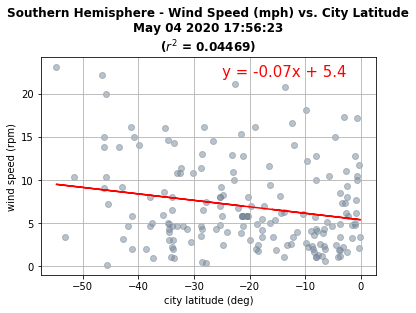

In [29]:
title ="Southern Hemisphere - Wind Speed (mph) vs. City Latitude"
make_regress_plots(title,
                   south_hemi["Lat"],
                   south_hemi["Wind Speed (mph)"],
                   "city latitude (deg)",
                   "wind speed (rpm)",
                   -25,
                   22
                  )
plt.show()

##### <font color = blue>The plots above show that a city's wind speed is not correlated to its geographical latitude.</font>
    
##### <font color = blue>From the regression lines, cities observe an increase in wind speeds as they move away from the equator.</font>